In [62]:
#from numpy import *
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [63]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return    
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [64]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    # --------- Insert your code here --------- #
    t = 0
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r * (T-t))
    p = norm.cdf(-d2) * K * np.exp(-r * (T-t)) - norm.cdf(-d1) * S0
    return c, p

In [65]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))
    call = np.zeros(numPaths)
    put = np.zeros(numPaths)
    for iPath in range(numPaths):
        call[iPath] = np.maximum(paths[numSteps, iPath] - K, 0) * np.exp(-r * T)
        put[iPath] = np.maximum(K - paths[numSteps, iPath], 0) * np.exp(-r * T)
    c = np.mean(call)
    p = np.mean(put)
    c_std = np.std(call)
    p_std = np.std(put)
    call_non_zero = np.count_nonzero(call)
    put_non_zero = np.count_nonzero(put)
    return c, p, paths, c_std, p_std, call_non_zero, put_non_zero

In [66]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))
    call = np.zeros(numPaths)
    put = np.zeros(numPaths)
    for iPath in range(numPaths):
        check = np.amax(paths[:,iPath])
        if check >= Sb:
            call[iPath] = np.maximum(paths[numSteps, iPath] - K, 0) * np.exp(-r * T)
            put[iPath] = np.maximum(K - paths[numSteps, iPath], 0) * np.exp(-r * T)
        else:
            call[iPath] = 0
            put[iPath] = 0
    c = np.mean(call)
    p = np.mean(put)
    c_std = np.std(call)
    p_std = np.std(put)
    call_non_zero = np.count_nonzero(call)
    put_non_zero = np.count_nonzero(put)
    return c, p, c_std, p_std, call_non_zero, put_non_zero

In [67]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;

In [68]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, path_one_step, callMC_European_Price_1_step_std, putMC_European_Price_1_step_std, callMC_European_Price_1_step_non_zero, putMC_European_Price_1_step_non_zero = MC_european_price(S0, K, T, r, mu, sigma, 1, 50000)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, path_multi_step, callMC_European_Price_multi_step_std, putMC_European_Price_multi_step_std, callMC_European_Price_multi_step_non_zero, putMC_European_Price_multi_step_non_zero = MC_european_price(S0, K, T, r, mu, sigma, 12, 50000)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step, callMC_Barrier_Knockin_Price_1_step_std, putMC_Barrier_Knockin_Price_1_step_std, callMC_Barrier_Knockin_Price_1_step_non_zero, putMC_Barrier_Knockin_Price_1_step_non_zero = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, 50000)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step, callMC_Barrier_Knockin_Price_multi_step_std, putMC_Barrier_Knockin_Price_multi_step_std, callMC_Barrier_Knockin_Price_multi_step_non_zero, putMC_Barrier_Knockin_Price_multi_step_non_zero = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 12, 50000)

In [53]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.053341201756446
One-step MC price of an European put option is 7.952932978097002
Multi-step MC price of an European call option is 7.966943327466327
Multi-step MC price of an European put option is 7.909337345381954
One-step MC price of an Barrier call option is 7.8562415040778015
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.921311373322592
Multi-step MC price of an Barrier put option is 1.255888087788655


Text(0.5, 1.0, 'Geometric Random Walk Paths')

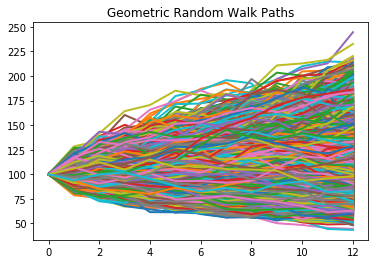

In [9]:
# Plot results
# --------- Insert your code here --------- #
[plt.plot(path_multi_step[:,i], linewidth=2) for i in range(50000)]
plt.title('Geometric Random Walk Paths')

In [74]:
print('=======================================European Option=======================================')
print('One-step MC price STD of an European call option is', callMC_European_Price_1_step_std)
print('One-step MC price STD of an European put option is', putMC_European_Price_1_step_std)
print('Multi-step MC price STD of an European call option is', callMC_European_Price_multi_step_std)
print('Multi-step MC price STD of an European put option is', putMC_European_Price_multi_step_std)
print('---------------------------------------------------------------------------------------')
print('Number of European Call Option One Step Non Zero Payoff', callMC_European_Price_1_step_non_zero)
print('Number of European Put Option One Step Non Zero Payoff', putMC_European_Price_1_step_non_zero)
print('Number of European Call Option Multi Step Non Zero Payoff', callMC_European_Price_multi_step_non_zero)
print('Number of European Put Option Multi Step Non Zero Payoff', putMC_European_Price_multi_step_non_zero)
print('')
print('=======================================Barrier Option=======================================')
print('One-step MC price STD of an Barrier call option is', callMC_Barrier_Knockin_Price_1_step_std)
print('One-step MC price STD of an Barrier put option is', putMC_Barrier_Knockin_Price_1_step_std)
print('Multi-step MC price STD of an Barrier call option is', callMC_Barrier_Knockin_Price_multi_step_std)
print('Multi-step MC price STD of an Barrier put option is', putMC_Barrier_Knockin_Price_multi_step_std)
print('---------------------------------------------------------------------------------------')
print('Number of Barrier Call Option One Step Non Zero Payoff', callMC_Barrier_Knockin_Price_1_step_non_zero)
print('Number of Barrier Put Option One Step Non Zero Payoff', putMC_Barrier_Knockin_Price_1_step_non_zero)
print('Number of Barrier Call Option Multi Step Non Zero Payoff', callMC_Barrier_Knockin_Price_multi_step_non_zero)
print('Number of Barrier Put Option Multi Step Non Zero Payoff', putMC_Barrier_Knockin_Price_multi_step_non_zero)

=======================================European Option=======================================
One-step MC price STD of an European call option is 13.062152012779599
One-step MC price STD of an European put option is 10.370720541431483
Multi-step MC price STD of an European call option is 13.164602844254508
Multi-step MC price STD of an European put option is 10.362885804708506
---------------------------------------------------------------------------------------
Number of European Call Option One Step Non Zero Payoff 23169
Number of European Put Option One Step Non Zero Payoff 26831
Number of European Call Option Multi Step Non Zero Payoff 23251
Number of European Put Option Multi Step Non Zero Payoff 26749

=======================================Barrier Option=======================================
One-step MC price STD of an Barrier call option is 13.139411037029042
One-step MC price STD of an Barrier put option is 0.0
Multi-step MC price STD of an Barrier call option is 13.17384796

In [61]:
print('Stock Price MEAN for one step', np.mean(path_one_step[1]))
print('Stock Price MEAN for multi step', np.mean(path_multi_step[12]))
print('Stock Price STD for one step', np.std(path_one_step[1]))
print('Stock Price STD for multi step', np.std(path_multi_step[12]))

Stock Price MEAN for one step 105.10555626337162
Stock Price MEAN for multi step 105.06055950394368
Stock Price STD for one step 21.307307849455665
Stock Price STD for multi step 21.16988689911809


In [10]:
sigma_increased = sigma * 1.1
sigma_decreased = sigma * 0.9

callMC_Barrier_Knockin_Price_1_step_inc, putMC_Barrier_Knockin_Price_1_step_inc = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma_increased, 1, 50000)
callMC_Barrier_Knockin_Price_multi_step_inc, putMC_Barrier_Knockin_Price_multi_step_inc = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma_increased, 12, 10000)

callMC_Barrier_Knockin_Price_1_step_dec, putMC_Barrier_Knockin_Price_1_step_dec = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma_decreased, 1, 50000)
callMC_Barrier_Knockin_Price_multi_step_dec, putMC_Barrier_Knockin_Price_multi_step_dec = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma_decreased, 12, 10000)

In [16]:
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))
print('---------------------------------------------------------------------------------------')
print('Increased-Volatility One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_inc)) 
print('Increased-Volatility One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_inc)) 
print('Increased-Volatility Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_inc)) 
print('Increased-Volatility Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_inc))
print('---------------------------------------------------------------------------------------')
print('Decreased-Volatility One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_dec)) 
print('Decreased-Volatility One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_dec)) 
print('Decreased-Volatility Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_dec)) 
print('Decreased-Volatility Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_dec))

One-step MC price of an Barrier call option is 7.756933372844206
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.887151544509743
Multi-step MC price of an Barrier put option is 1.3023554816519625
---------------------------------------------------------------------------------------
Increased-Volatility One-step MC price of an Barrier call option is 8.558119941665622
Increased-Volatility One-step MC price of an Barrier put option is 0.0
Increased-Volatility Multi-step MC price of an Barrier call option is 8.78232982970435
Increased-Volatility Multi-step MC price of an Barrier put option is 1.6047215253879994
---------------------------------------------------------------------------------------
Decreased-Volatility One-step MC price of an Barrier call option is 6.897198388766839
Decreased-Volatility One-step MC price of an Barrier put option is 0.0
Decreased-Volatility Multi-step MC price of an Barrier call option is 7.15600686461918

In [35]:
BS_call = call_BS_European_Price
BS_put = putBS_European_Price

step_list = [1, 2, 4, 12, 52]
path = 10000
keep_running = True
while (keep_running):
    path = path + 1000
    for step in step_list:
        optimal_call, optimal_put, _, = MC_european_price(S0, K, T, r, mu, sigma, step, path)
        #print('Path=', path, 'Step=', step, 'ABS=', optimal_call - BS_call, optimal_put - BS_put)
        if abs(optimal_call - BS_call) <= 0.01 and abs(optimal_put - BS_put) <= 0.01:
            keep_running = False
            break
print('Optimal Number of Time Steps:', step)
print('Optimal Number of Paths:', path)
print('Black-Scholes price of an European call option:', BS_call)
print('Black-Scholes price of an European put option:', BS_put)
print('Optimal price of call option:', optimal_call)
print('Optimal price of put option:', optimal_put)

Optimal Number of Time Steps: 1
Optimal Number of Paths: 22000
Black-Scholes price of an European call option: 8.021352235143176
Black-Scholes price of an European put option: 7.9004418077181455
Optimal price of call option: 8.022253015226859
Optimal price of put option: 7.893047983895178
